In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate
import os

bs = 32

np.random.seed(2)

In [2]:
path = os.path.abspath(os.getcwd())
path_img = path+'/dogs-vs-cats/train'
class_pattern = r'/([^/]+)\.\d+.jpg$'

In [3]:
fnames = get_image_files(path_img)
data = ImageDataBunch.from_name_re(path_img, fnames, class_pattern, ds_tfms=get_transforms(), size=224, bs=bs)
data = data.normalize(imagenet_stats)

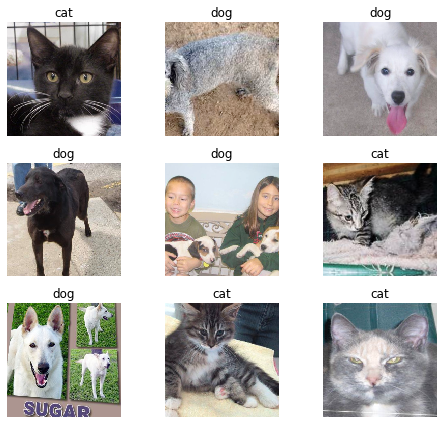

In [4]:
data.show_batch(rows=3, figsize=(7,6))

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [6]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.099305,0.036105,0.012800,03:09
1,0.072553,0.025799,0.008800,03:06
2,0.072064,0.019997,0.007400,03:06
3,0.034398,0.019830,0.008200,03:06


In [7]:
learn.save('cat_vs_dog_model')

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

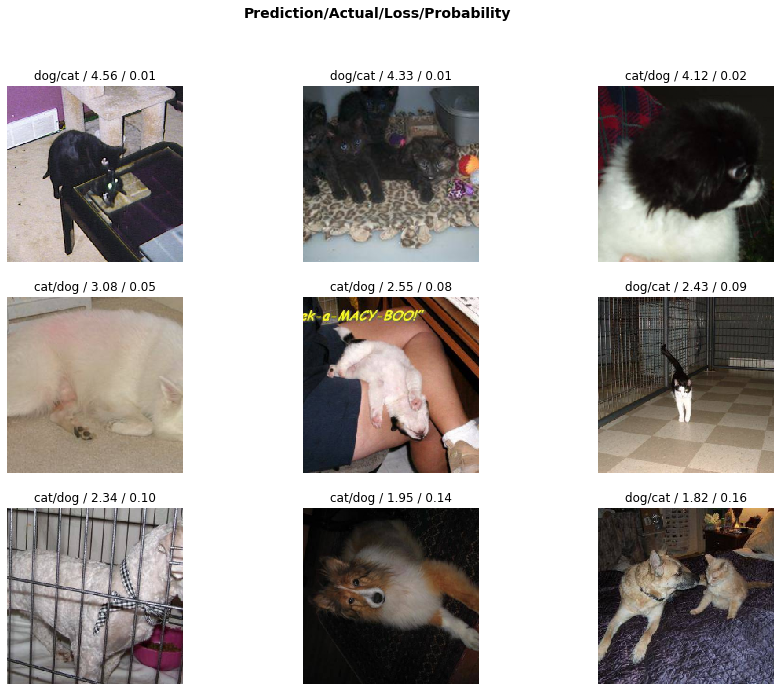

In [9]:
interp.plot_top_losses(9, figsize=(15,11))

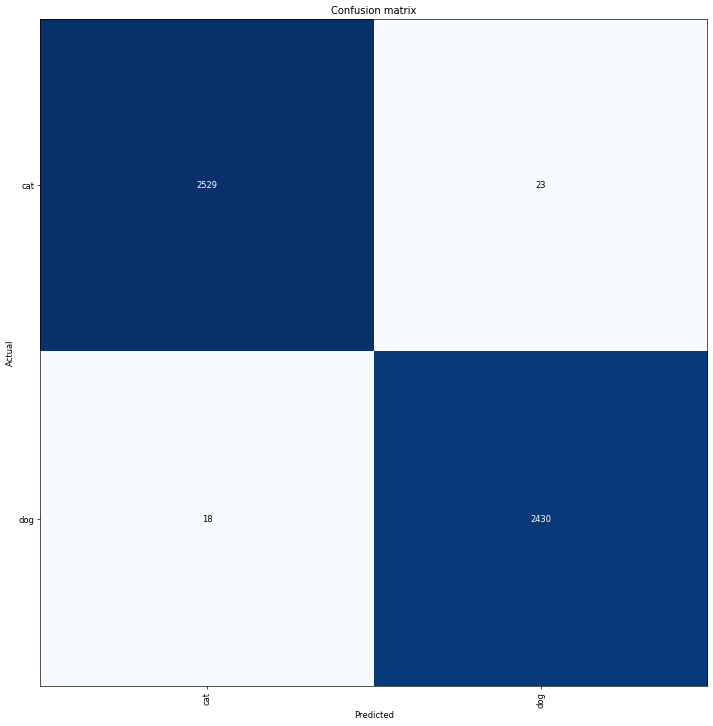

In [10]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)